In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

In [2]:
path = 'F:\machine learning and deep learning\datasets\walmart-recruiting-store-sales-forecasting'
dirlst = os.listdir(path)

In [3]:
dirlst

['features.csv', 'sampleSubmission.csv', 'stores.csv', 'test.csv', 'train.csv']

In [4]:
data_f = pd.read_csv(path +"\\" + dirlst[0])

In [5]:
data_f.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
data_s = pd.read_csv(path +"\\" + dirlst[2])
data_s.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
data_train = pd.read_csv(path +"\\" + dirlst[-1])

In [8]:
data_test = pd.read_csv(path +"\\" + dirlst[-2])

In [9]:
data_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [10]:
data_train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [12]:
#data_train.Date = pd.to_datetime(data_train.Date)

In [54]:
data_train.Date.nunique()

143

In [12]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


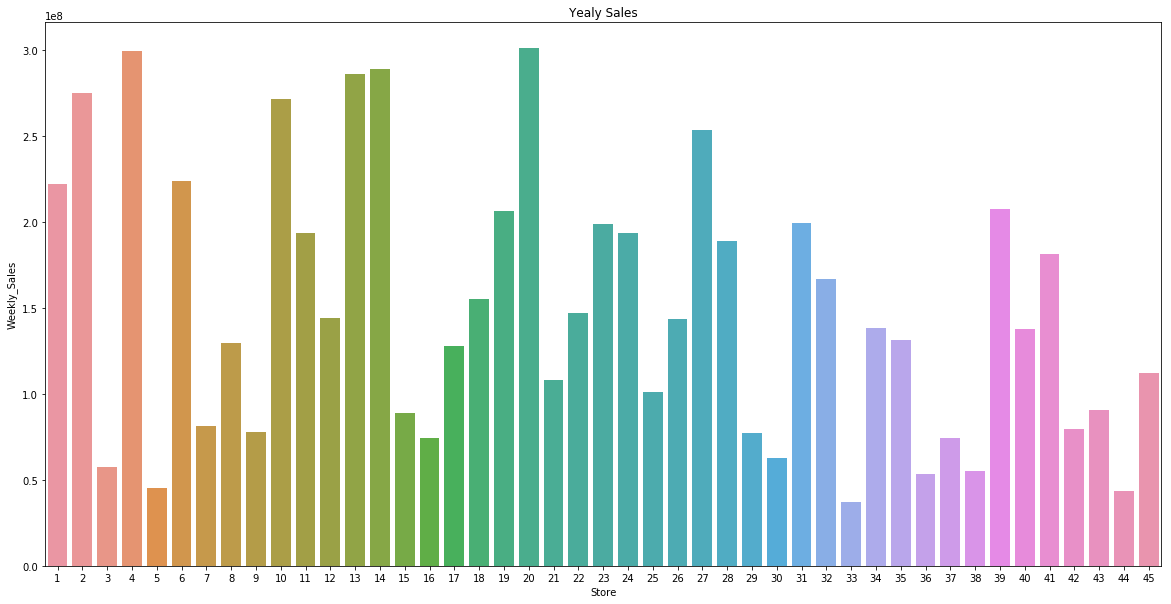

In [15]:
fig=plt.figure(figsize=(20,10))
plt.title('Yealy Sales')
sns.barplot(x = 'Store',y='Weekly_Sales',data = data_train.groupby(['Store'],as_index=False).sum().drop(['IsHoliday','Dept'],axis=1));

In [15]:
 data_train.groupby(['Store','Date'],as_index=False).sum().drop(['IsHoliday','Dept'],axis = 1)

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
5,1,2010-03-12,1439541.59
6,1,2010-03-19,1472515.79
7,1,2010-03-26,1404429.92
8,1,2010-04-02,1594968.28
9,1,2010-04-09,1545418.53


In [16]:
yearly_sales = data_train.groupby(['Store'],as_index=False).sum().drop(['IsHoliday','Dept'],axis = 1)

In [17]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB


In [18]:
data_master = data_train.merge(data_s, how='left').merge(data_f,how='left')

In [19]:
data_master.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [20]:
data_master['MarkDown1'] = data_master['MarkDown1'].fillna(0)

In [21]:
data_master['MarkDown2'] = data_master['MarkDown2'].fillna(0)

In [22]:
data_master['MarkDown3'] = data_master['MarkDown3'].fillna(0)

In [23]:
data_master['MarkDown4'] = data_master['MarkDown4'].fillna(0)

In [24]:
data_master['MarkDown5'] = data_master['MarkDown5'].fillna(0)

In [25]:
data_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [26]:
data_master.corr()['Weekly_Sales']

Store          -0.085195
Dept            0.148032
Weekly_Sales    1.000000
IsHoliday       0.012774
Size            0.243828
Temperature    -0.002312
Fuel_Price     -0.000120
MarkDown1       0.047172
MarkDown2       0.020716
MarkDown3       0.038562
MarkDown4       0.037467
MarkDown5       0.050465
CPI            -0.020921
Unemployment   -0.025864
Name: Weekly_Sales, dtype: float64

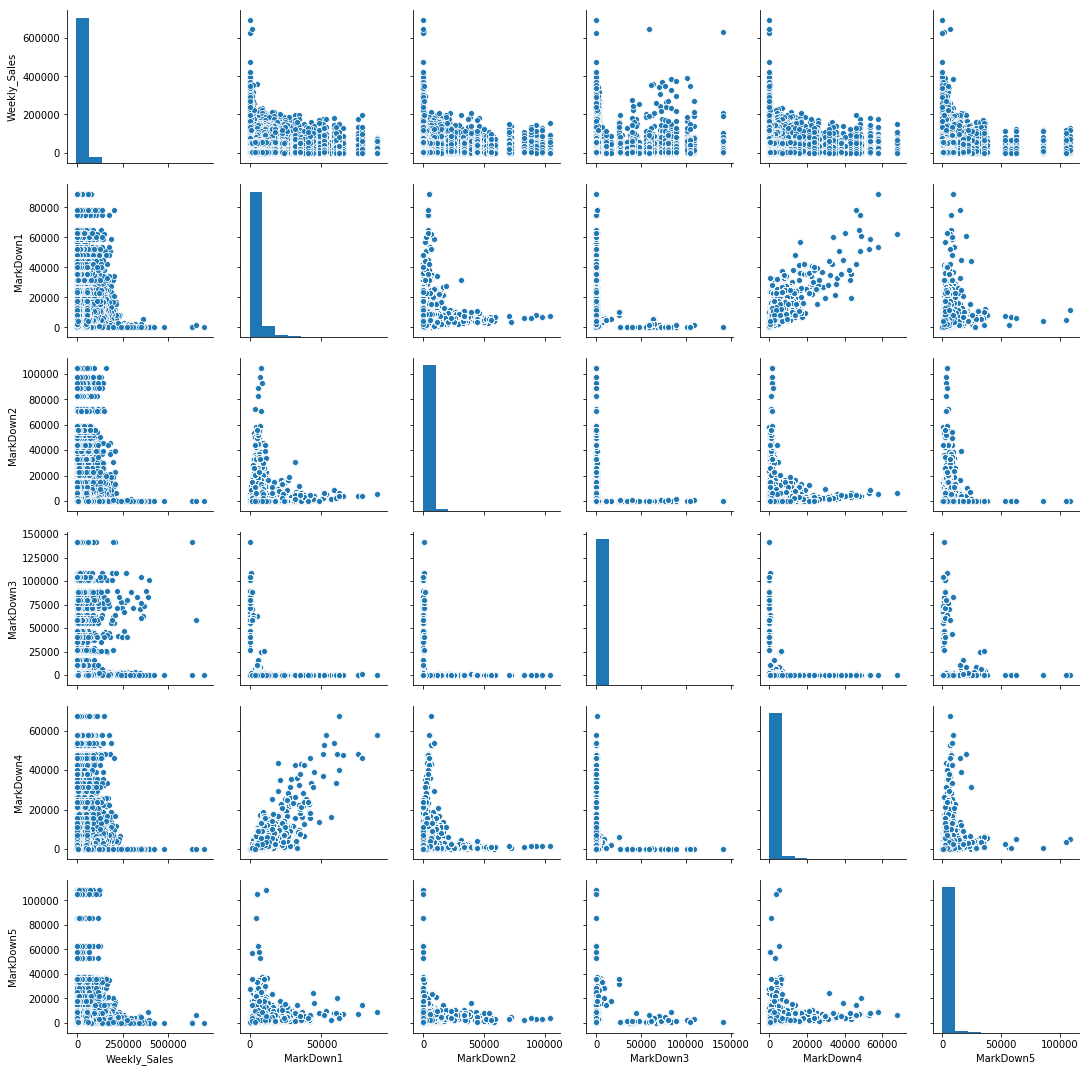

In [27]:
sns.pairplot(data_master, vars=['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']);

In [28]:
np.corrcoef(data_master['Store'],data_master['Weekly_Sales'])

array([[ 1.        , -0.08519499],
       [-0.08519499,  1.        ]])

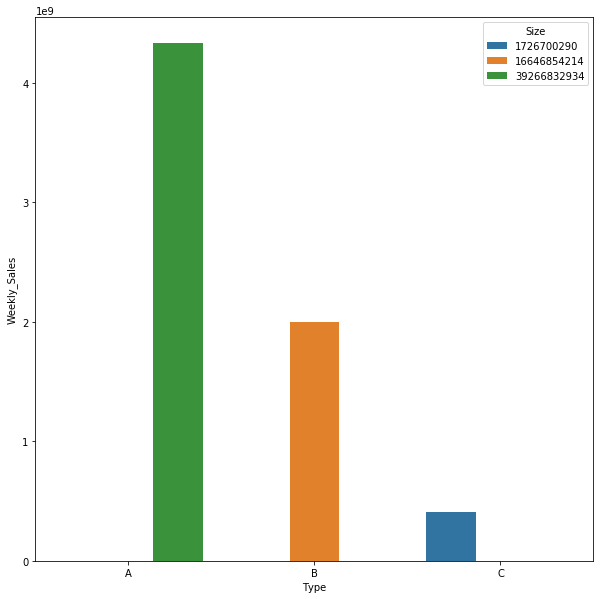

In [29]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x= 'Type' , y= 'Weekly_Sales',hue = 'Size',data=data_master[['Type','Size','Weekly_Sales']].groupby('Type',as_index=False).sum());

In [30]:
data_master['Month'] = pd.to_datetime(data_master['Date']).dt.month

In [31]:
data_master.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,2
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,2
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,2
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,3


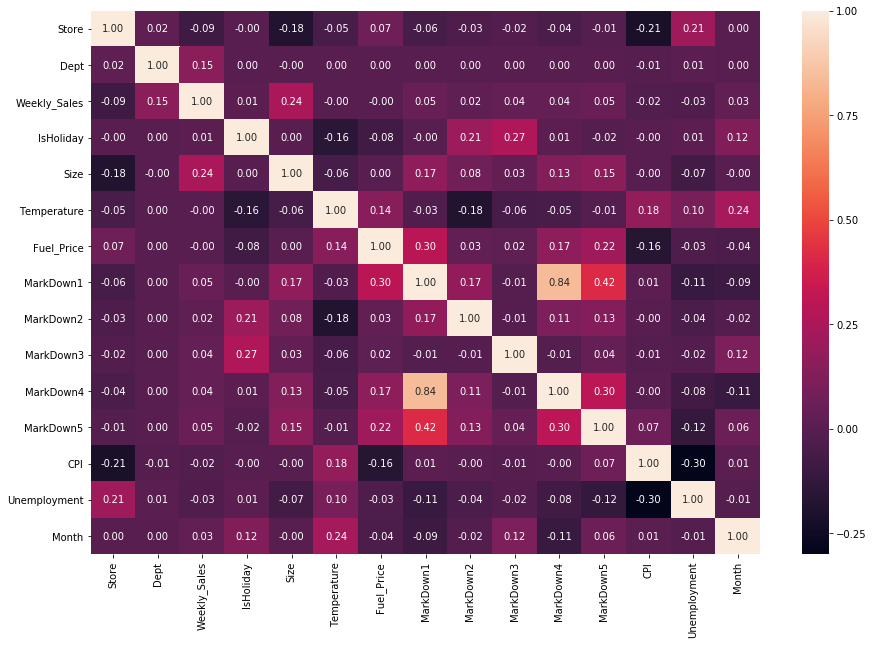

In [32]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(data_master.corr(),annot=True,fmt='.2f');

In [33]:
data_master.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'MarkDown3'],inplace = True)

In [34]:
data_master.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5,Month
0,1,1,24924.50,False,A,151315,42.31,0.0,0.0,0.0,0.0,2
1,1,1,46039.49,True,A,151315,38.51,0.0,0.0,0.0,0.0,2
2,1,1,41595.55,False,A,151315,39.93,0.0,0.0,0.0,0.0,2
3,1,1,19403.54,False,A,151315,46.63,0.0,0.0,0.0,0.0,2
4,1,1,21827.90,False,A,151315,46.50,0.0,0.0,0.0,0.0,3


In [35]:
data_master = pd.get_dummies(data_master, columns=["Type"])

In [36]:
data_master.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5,Month,Type_A,Type_B,Type_C
0,1,1,24924.50,False,151315,42.31,0.0,0.0,0.0,0.0,2,1,0,0
1,1,1,46039.49,True,151315,38.51,0.0,0.0,0.0,0.0,2,1,0,0
2,1,1,41595.55,False,151315,39.93,0.0,0.0,0.0,0.0,2,1,0,0
3,1,1,19403.54,False,151315,46.63,0.0,0.0,0.0,0.0,2,1,0,0
4,1,1,21827.90,False,151315,46.50,0.0,0.0,0.0,0.0,3,1,0,0


In [37]:
data_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 14 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Size            421570 non-null int64
Temperature     421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
Month           421570 non-null int64
Type_A          421570 non-null uint8
Type_B          421570 non-null uint8
Type_C          421570 non-null uint8
dtypes: bool(1), float64(6), int64(4), uint8(3)
memory usage: 57.0 MB


In [38]:
#from sklearn.neural_network import MLPRegressor

In [38]:
from sklearn.covariance import EmpiricalCovariance

In [39]:
cov = EmpiricalCovariance()
cov.fit(data_master)

EmpiricalCovariance(assume_centered=False, store_precision=True)

In [40]:
cov.location_

array([2.22005456e+01, 4.42603174e+01, 1.59812581e+04, 7.03584221e-02,
       1.36727916e+05, 6.00900587e+01, 2.59007482e+03, 8.79974298e+02,
       1.08313227e+03, 1.66277238e+03, 6.44951016e+00, 5.11132196e-01,
       3.87824086e-01, 1.01043718e-01])

In [41]:
pd.DataFrame(cov.covariance_,columns=data_master.columns,index=data_master.columns)

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5,Month,Type_A,Type_B,Type_C
Store,163.463442,9.357807,-2.473795e+04,-0.001792,-1.425841e+05,-11.815951,-4.630816e+03,-2.199132e+03,-2.127362e+03,-6.698377e+02,0.041904,-0.237230,-1.454390,1.691620
Dept,9.357807,929.763153,1.025135e+05,0.007144,-5.515889e+03,2.495607,2.757429e+02,9.098471e+01,2.300596e+02,3.423061e+02,0.089375,0.184948,-0.445239,0.260292
Weekly_Sales,-24737.945955,102513.532654,5.157966e+08,74.197534,3.376866e+08,-968.853684,6.484146e+06,2.392247e+06,3.313941e+06,4.822464e+06,2092.557594,2105.000794,-1452.084019,-652.916775
IsHoliday,-0.001792,0.007144,7.419753e+01,0.065408,9.248885e+00,-0.735774,-5.449544e+00,2.699621e+02,1.151930e+01,-1.639480e+01,0.102334,0.000058,0.000021,-0.000078
Size,-142584.086942,-5515.889110,3.376866e+08,9.248885,3.718623e+09,-65599.896025,6.266470e+07,2.429988e+07,3.024047e+07,3.925996e+07,-239.295542,23258.237319,-13538.620798,-9719.616521
Temperature,-11.815951,2.495607,-9.688537e+02,-0.735774,-6.559990e+04,340.325356,-2.949348e+03,-1.685310e+04,-3.612475e+03,-1.145112e+03,14.118971,0.225862,-0.980073,0.754211
MarkDown1,-4630.815908,275.742875,6.484146e+06,-5.449544,6.266470e+07,-2949.348263,3.663129e+07,5.381294e+06,1.977394e+07,1.056972e+07,-1751.031739,261.867527,-14.197794,-247.669733
MarkDown2,-2199.131509,90.984710,2.392247e+06,269.962106,2.429988e+07,-16853.095830,5.381294e+06,2.585247e+07,2.242558e+06,2.818315e+06,-319.245036,103.883459,-20.350621,-83.532837
MarkDown4,-2127.362087,230.059639,3.313941e+06,11.519297,3.024047e+07,-3612.474679,1.977394e+07,2.242558e+06,1.516733e+07,4.971226e+06,-1333.421226,124.081948,-15.204485,-108.877463
MarkDown5,-669.837656,342.306063,4.822464e+06,-16.394802,3.925996e+07,-1145.112421,1.056972e+07,2.818315e+06,4.971226e+06,1.770410e+07,761.045728,247.928650,-131.026550,-116.902100


In [42]:
X = data_master.drop(['Weekly_Sales'],axis=1)
Y = data_master['Weekly_Sales']

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [44]:
clf = LinearRegression(normalize=True)
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [45]:
y_pred = clf.predict(x_test)

In [46]:
r2_score(y_test,y_pred)

0.08839205419848029

In [47]:
mean_squared_error(y_test,y_pred)

473753429.9772344

In [48]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=1)

In [49]:
clf.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   38.6s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [50]:
y_pred2 = clf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.6s finished


In [51]:
r2_score(y_test,y_pred2)

0.8112314971198668